In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heartbeat/ptbdb_abnormal.csv
/kaggle/input/heartbeat/ptbdb_normal.csv
/kaggle/input/heartbeat/mitbih_test.csv
/kaggle/input/heartbeat/mitbih_train.csv


# Import neccessary libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Preprocessing

In [3]:
normal_df=pd.read_csv("/kaggle/input/heartbeat/ptbdb_normal.csv",header=None)
abnormal_df=pd.read_csv("/kaggle/input/heartbeat/ptbdb_abnormal.csv",header=None)

In [4]:
normal_df.shape

(4046, 188)

In [5]:
abnormal_df.shape

(10506, 188)

In [6]:
normal_df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [7]:
ECG_df=pd.concat([normal_df,abnormal_df],axis=0)

In [8]:
ECG_df.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [9]:
ECG_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14552 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 21.0 MB


In [10]:
ECG_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,...,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.0,14552.000000
mean,0.976637,0.721663,0.403099,0.242893,0.207218,0.216453,0.221752,0.224486,0.227349,0.229704,...,0.001190,0.001133,0.000900,0.000739,0.000661,0.000475,0.000177,0.000185,0.0,0.721963
std,0.034532,0.195690,0.249794,0.249519,0.218097,0.192412,0.180740,0.176943,0.176674,0.176579,...,0.021361,0.021012,0.017316,0.014640,0.014033,0.012289,0.006545,0.006835,0.0,0.448047
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.959377,0.584589,0.212300,0.052269,0.061875,0.090487,0.096503,0.097095,0.097231,0.097144,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,0.740148,0.371911,0.168148,0.136082,0.159451,0.167479,0.171541,0.177380,0.180337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,1.000000,0.881483,0.557785,0.336232,0.264104,0.264633,0.286484,0.302255,0.311664,0.325292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.371502,0.376668,0.0,1.000000


In [11]:
ECG_df.shape

(14552, 188)

In [12]:
ECG_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
ECG_df.duplicated().sum()

7

In [14]:
ECG_df.drop_duplicates( keep="first", inplace=True)

In [15]:
X=ECG_df.iloc[:,:186]
y=ECG_df.iloc[:,187]

In [16]:
X=np.array(X)
mms=MinMaxScaler()
mms.fit(X)
mms.transform(X)
X=pd.DataFrame(X)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

In [18]:
acc=[]
recall=[]

# Gaussian SVM

In [19]:
svm_gau = svm.SVC(kernel='rbf', random_state=42)
svm_gau.fit(x_train,y_train)
y_pre_svmg=svm_gau.predict(x_test)

In [20]:
accuracy_svmg=np.round(accuracy_score(y_test,y_pre_svmg)*100,2)
print("The accuracy of SVM rbf model is ",accuracy_svmg,"%")
confusion_matrix(y_test,y_pre_svmg)

The accuracy of SVM rbf model is  92.02 %


array([[ 649,  134],
       [  98, 2028]])

In [21]:
re_svmg=np.round(metrics.recall_score(y_test,y_pre_svmg)*100,2)

In [22]:
print("The Recall of SVM rbf model is ",np.round(metrics.recall_score(y_test,y_pre_svmg)*100,2),"%")

The Recall of SVM rbf model is  95.39 %


In [23]:
acc.append(accuracy_svmg)
recall.append(re_svmg)

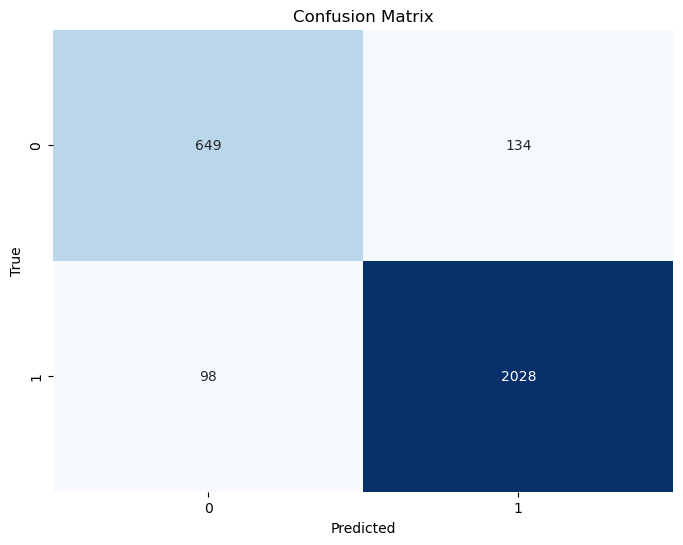

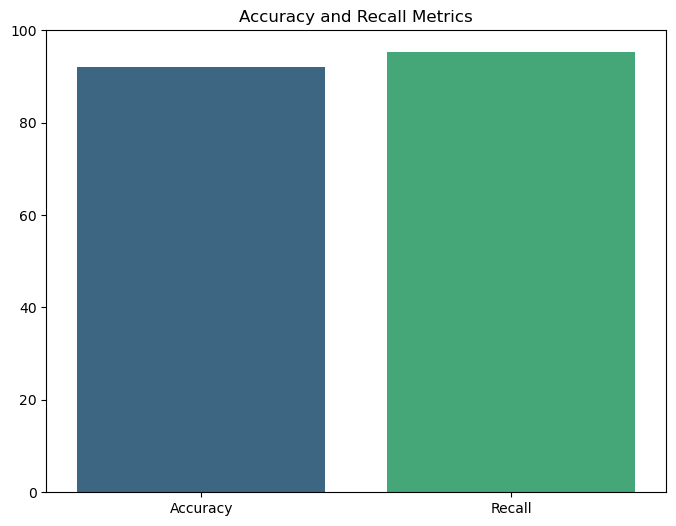

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pre_svmg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Bar plot for Accuracy and Recall
metrics_data = {"Metric": ["Accuracy", "Recall"],
                "Value": [accuracy_svmg, re_svmg]}

plt.figure(figsize=(8, 6))
sns.barplot(x="Metric", y="Value", data=metrics_data, palette="viridis")
plt.ylim(0, 100)
plt.title("Accuracy and Recall Metrics")
plt.show()


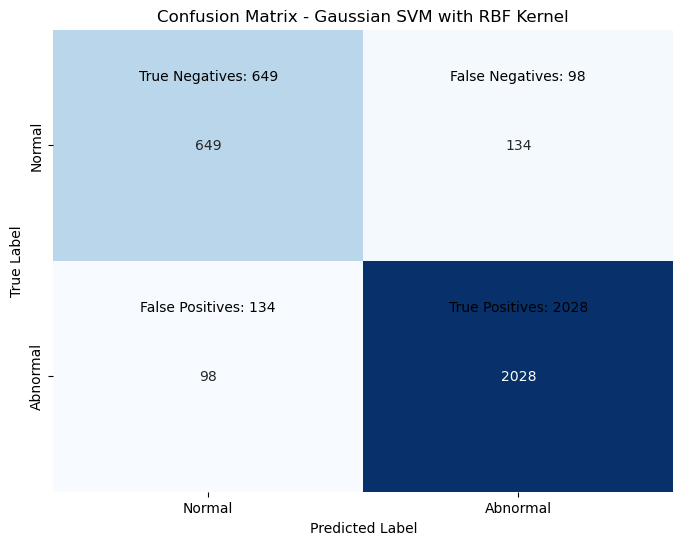

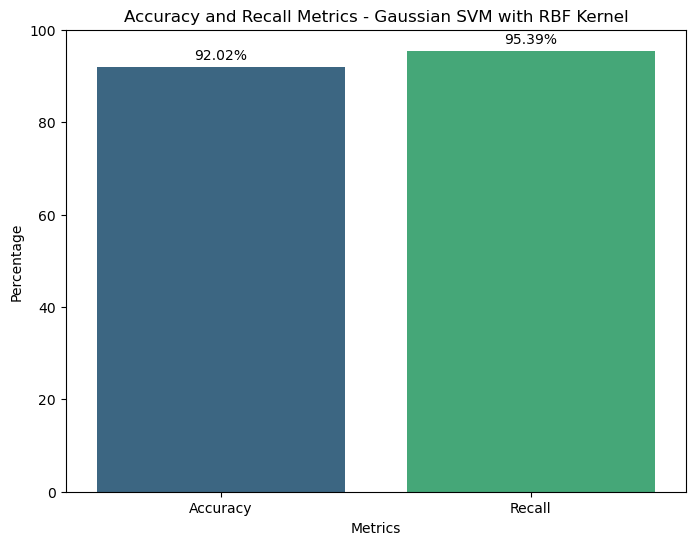

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pre_svmg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Gaussian SVM with RBF Kernel")
plt.xticks(ticks=[0.5, 1.5], labels=["Normal", "Abnormal"])
plt.yticks(ticks=[0.5, 1.5], labels=["Normal", "Abnormal"])
plt.text(0.5, 0.2, f"True Negatives: {cm[0, 0]}", ha="center", va="center", color="black")
plt.text(0.5, 1.2, f"False Positives: {cm[0, 1]}", ha="center", va="center", color="black")
plt.text(1.5, 0.2, f"False Negatives: {cm[1, 0]}", ha="center", va="center", color="black")
plt.text(1.5, 1.2, f"True Positives: {cm[1, 1]}", ha="center", va="center", color="black")
plt.show()

# Bar plot for Accuracy and Recall
metrics_data = {"Metric": ["Accuracy", "Recall"],
                "Value": [accuracy_svmg, re_svmg]}

plt.figure(figsize=(8, 6))
sns.barplot(x="Metric", y="Value", data=metrics_data, palette="viridis")
plt.ylim(0, 100)
plt.title("Accuracy and Recall Metrics - Gaussian SVM with RBF Kernel")
plt.xlabel("Metrics")
plt.ylabel("Percentage")
for i, value in enumerate(metrics_data["Value"]):
    plt.text(i, value + 1, f"{value}%", ha="center", va="bottom", color="black")
plt.show()
